In [1]:
import tensorflow as tf
import numpy as np
import sys
import matplotlib.pyplot as plt
import random
import mxnet as mx
from mxnet import gluon
from mxnet import ndarray as nd
from mxnet.gluon import nn, utils
from mxnet import autograd


/home/alexchen/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
a = iter(x)
for i in a:
    first = i
    second = next(a, first)
    third = next(a,first)
    four = next(a, first)
    print(first)
    print(second)
    print(third)
    print(four)
    print("----")
    

1
2
3
4
----
5
6
7
8
----
9
10
9
9
----


In [3]:
from itertools import tee
def pairwise(iterable):
    "s -> (s0,s1,s2,s3), (s1,s2,s3,s4), (s2, s3,s4,s5), ..."
    a, b, c, d = tee(iterable, n=4)
    next(b, None)
    return zip(a, b)

In [4]:
batch_size = 128
n_mixture = 8
std = 0.025
radius = 1.0
latent_z_size =100
epochs = 5000

use_gpu = True
ctx = mx.gpu() if use_gpu else mx.cpu()

lr = 0.00002
beta1 = 0.5
dropout = 0.5

#unroll_steps = 4

In [5]:
thetas = np.linspace(0, 2 * np.pi - 2 * np.pi / n_mixture, n_mixture)
centers = []
for i in range(0, len(thetas)):
    centers.append([radius * np.sin(thetas[i]), radius * np.cos(thetas[i])])
samples = []
for c in centers:
    samples.extend(np.random.normal(loc=c, scale=std, size=[8192, 2]).tolist())
#for s in range(len(samples)):
#    samples[s] = tf.convert_to_tensor(samples[s])
#for z in range(len(samples)):
#   samples[z] = [samples[z]]

#test output shape    
#o = np.array(samples)
#print(o.shape)
    
random.shuffle(samples)
samples = np.asarray(samples)
print(samples)
#print(samples.T[0:3])
train_data = mx.io.NDArrayIter(data = samples, batch_size = batch_size)

[[-0.98007103 -0.01646081]
 [-0.71186612 -0.71668738]
 [ 0.0198857   1.01925751]
 ...
 [ 0.66901732 -0.71548305]
 [-0.70955373 -0.69024977]
 [-0.71481834 -0.73561258]]


65536
2
[[-0.98007103 -0.71186612  0.0198857  ...  0.66901732 -0.70955373
  -0.71481834]
 [-0.01646081 -0.71668738  1.01925751 ... -0.71548305 -0.69024977
  -0.73561258]]


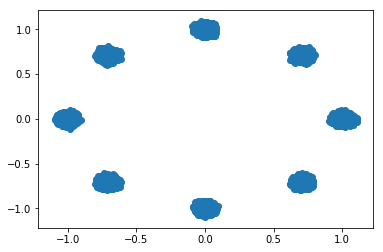

In [6]:
print(len(samples))
print(len(samples[0]))
#print(len(samples[0][0]))
print(samples.T)

x= samples.T[0]
y = samples.T[1]
plt.scatter(x,y)

In [7]:
netG = nn.Sequential()
with netG.name_scope():
    
    #Convolutional
    #initially 128 x 100 x 2
#     netG.add(nn.Conv1DTranspose(50, 4, in_channels = 100, padding = 2, strides =2))
#     netG.add(nn.BatchNorm())
#     netG.add(nn.Activation('relu'))
#     # should now be 128 x 50 x 2
#     netG.add(nn.Conv1DTranspose(25, 4, in_channels = 50, padding = 2, strides =2))
#     netG.add(nn.BatchNorm())
#     netG.add(nn.Activation('relu'))
#     # should still be 128 x 25 x 2
#     netG.add(nn.Conv1DTranspose(5, 4, in_channels = 25, padding = 2, strides =2))
#     netG.add(nn.BatchNorm())
#     netG.add(nn.Activation('relu'))
#     #should still be 128 x 5 x 2
#     netG.add(nn.Conv1DTranspose(2, 4,  in_channels = 5, padding = 2, strides =2))
#     netG.add(nn.BatchNorm())
#     netG.add(nn.Activation('relu'))
#     #should still be 128 x 2 x 2
#     netG.add(nn.Conv1DTranspose(1, 4,  in_channels = 2, padding = 2, strides =2))
#     netG.add(nn.LeakyReLU(0.2))
#     #should still be 128 x 1 x 2
    
    
#     #Dense
#     #initially 128 x 100 x 2
#     netG.add(nn.Dense(400))
#     netG.add(nn.BatchNorm())
#     netG.add(nn.LeakyReLU(0.2))
#     netG.add(nn.Dropout(0.5))
#     #netG.add(nn.Dense(640))
#     #netG.add(nn.LeakyReLU(0.2))
#     netG.add(nn.Dense(400))
#     netG.add(nn.BatchNorm())
#     netG.add(nn.Dropout(0.5))
#     #netG.add(nn.LeakyReLU(0.2))
#     netG.add(nn.Dense(2))



    #Try three smh
    netG.add(nn.Dense(128, activation = "tanh"))
    netG.add(nn.Dense(128, activation = "tanh"))
    netG.add(nn.Dense(2))
    
    

In [8]:
netD1 = nn.Sequential()
with netD1.name_scope():
    
    #Convolutional
    #input is 256 x 1 x 2
#     netD.add(nn.Conv1D(channels = 1, kernel_size = 5, padding = 2, in_channels = 1))
#     netD.add(nn.LeakyReLU(0.2))
#     # should still be 256 x 1 x 2
#     netD.add(nn.Conv1D(channels = 1, kernel_size = 5, padding = 2, in_channels = 1))
#     netD.add(nn.BatchNorm())
#     netD.add(nn.LeakyReLU(0.2))
#     # should still be 256 x 1 x 2
#     netD.add(nn.Conv1D(channels = 1, kernel_size = 5, padding = 2, in_channels = 1))
#     netD.add(nn.BatchNorm())
#     netD.add(nn.LeakyReLU(0.2))
#     # should still be 256 x 1 x 2
#     netD.add(nn.Conv1D(channels = 1, kernel_size = 5, padding = 2, in_channels = 1))
#     netD.add(nn.BatchNorm())
#     netD.add(nn.LeakyReLU(0.2))
#     # should still be 256 x 1 x 2
#     netD.add(nn.Conv1D(channels = 1, kernel_size = 5, strides = 2,padding = 2, in_channels = 1))
#     # should still be 256 x 1 x 1


    #Dense
    netD1.add(nn.Dense(200))
    netD1.add(nn.Dropout(0.5))
    netD1.add(nn.LeakyReLU(0.2))
    #netD.add(nn.Dense(100))
    #netD.add(nn.LeakyReLU(0.2))
    netD1.add(nn.Dense(200))
    netD1.add(nn.LeakyReLU(0.2))
    #netD.add(nn.Dropout(0.5))
    netD1.add(nn.Dense(1))
    
    
    
    #Try three smh
    
#     netD1.add(nn.Dense(128, activation = "tanh"))
#     netD1.add(nn.Dense(128, activation = "tanh"))
#     netD1.add(nn.Dense(1))

In [9]:
netD2 = nn.Sequential()
with netD2.name_scope():
    
    #Convolutional
    #input is 256 x 1 x 2
#     netD.add(nn.Conv1D(channels = 1, kernel_size = 5, padding = 2, in_channels = 1))
#     netD.add(nn.LeakyReLU(0.2))
#     # should still be 256 x 1 x 2
#     netD.add(nn.Conv1D(channels = 1, kernel_size = 5, padding = 2, in_channels = 1))
#     netD.add(nn.BatchNorm())
#     netD.add(nn.LeakyReLU(0.2))
#     # should still be 256 x 1 x 2
#     netD.add(nn.Conv1D(channels = 1, kernel_size = 5, padding = 2, in_channels = 1))
#     netD.add(nn.BatchNorm())
#     netD.add(nn.LeakyReLU(0.2))
#     # should still be 256 x 1 x 2
#     netD.add(nn.Conv1D(channels = 1, kernel_size = 5, padding = 2, in_channels = 1))
#     netD.add(nn.BatchNorm())
#     netD.add(nn.LeakyReLU(0.2))
#     # should still be 256 x 1 x 2
#     netD.add(nn.Conv1D(channels = 1, kernel_size = 5, strides = 2,padding = 2, in_channels = 1))
#     # should still be 256 x 1 x 1


    #Dense
    netD2.add(nn.Dense(256))
    netD2.add(nn.Dropout(0.5))
    netD2.add(nn.LeakyReLU(0.2))
    #netD.add(nn.Dense(100))
    #netD.add(nn.LeakyReLU(0.2))
    netD2.add(nn.Dense(200))
    netD2.add(nn.LeakyReLU(0.2))
    #netD.add(nn.Dropout(0.5))
    netD2.add(nn.Dense(1))



    #Try three smh
    #netD2.add(nn.Dense(128, activation = "tanh"))
    #netD2.add(nn.Dense(128, activation = "tanh"))
    #netD2.add(nn.Dense(1))
    
    

In [10]:
# netD3 = nn.Sequential()
# with netD3.name_scope():
    
#     #Convolutional
#     #input is 256 x 1 x 2
# #     netD.add(nn.Conv1D(channels = 1, kernel_size = 5, padding = 2, in_channels = 1))
# #     netD.add(nn.LeakyReLU(0.2))
# #     # should still be 256 x 1 x 2
# #     netD.add(nn.Conv1D(channels = 1, kernel_size = 5, padding = 2, in_channels = 1))
# #     netD.add(nn.BatchNorm())
# #     netD.add(nn.LeakyReLU(0.2))
# #     # should still be 256 x 1 x 2
# #     netD.add(nn.Conv1D(channels = 1, kernel_size = 5, padding = 2, in_channels = 1))
# #     netD.add(nn.BatchNorm())
# #     netD.add(nn.LeakyReLU(0.2))
# #     # should still be 256 x 1 x 2
# #     netD.add(nn.Conv1D(channels = 1, kernel_size = 5, padding = 2, in_channels = 1))
# #     netD.add(nn.BatchNorm())
# #     netD.add(nn.LeakyReLU(0.2))
# #     # should still be 256 x 1 x 2
# #     netD.add(nn.Conv1D(channels = 1, kernel_size = 5, strides = 2,padding = 2, in_channels = 1))
# #     # should still be 256 x 1 x 1


# #     #Dense
# #     netD2.add(nn.Dense(256))
# #     netD2.add(nn.Dropout(0.5))
# #     netD2.add(nn.LeakyReLU(0.2))
# #     #netD.add(nn.Dense(100))
# #     #netD.add(nn.LeakyReLU(0.2))
# #     netD2.add(nn.Dense(200))
# #     netD2.add(nn.LeakyReLU(0.2))
# #     #netD.add(nn.Dropout(0.5))
# #     netD2.add(nn.Dense(1))



#     #Try three smh
#     netD3.add(nn.Dense(128, activation = "tanh"))
#     netD3.add(nn.Dense(128, activation = "tanh"))
#     netD3.add(nn.Dense(1))
    
    

In [11]:
loss = gluon.loss.SigmoidBinaryCrossEntropyLoss()

netG.initialize(mx.init.Normal(0.095), ctx = ctx)
netD1.initialize(mx.init.Normal(0.095), ctx = ctx)
netD2.initialize(mx.init.Normal(0.095), ctx = ctx)

trainerG = gluon.Trainer(netG.collect_params(), 'adam', {'learning_rate': lr, 'beta1':beta1})
trainerD1 = gluon.Trainer(netD1.collect_params(), 'adam', {'learning_rate': lr, 'beta1':beta1})
trainerD2 = gluon.Trainer(netD2.collect_params(), 'adam', {'learning_rate': lr, 'beta1':beta1})
#unrolledtrainerD = gluon.Trainer(netD.collect_params(), 'adam', {'learning_rate': lr, 'beta1':beta1})


Begin
BEFORE THE FIRE:
Plot 0


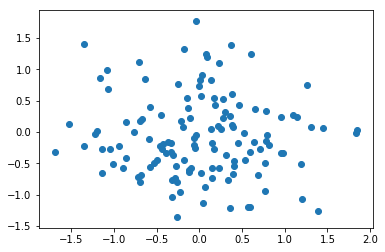

Plot 1


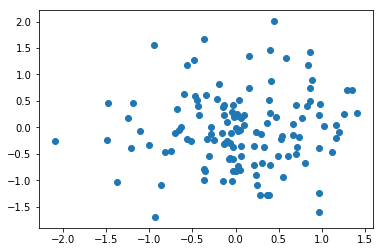

Plot 2


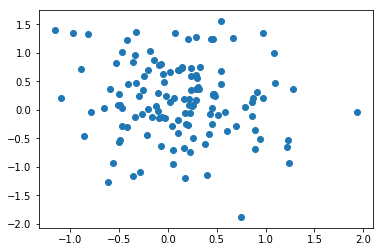

Plot 3


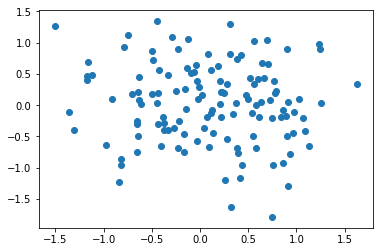

Plot 4


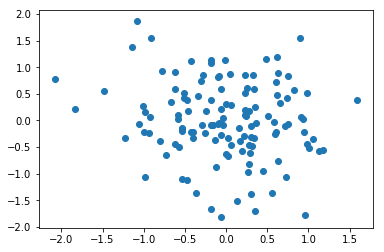

Good luck bud


INFO:root:
binary training acc at epoch 0: facc=0.550735
INFO:root:time: 2.447112
INFO:root:time: 2.447745


Epoch: 0
epoch 0
Plot 0


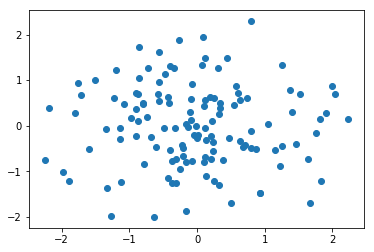

Plot 1


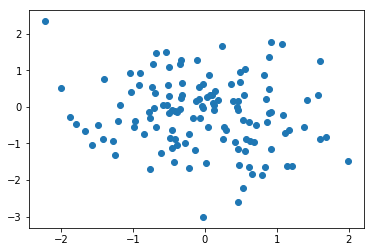

Plot 2


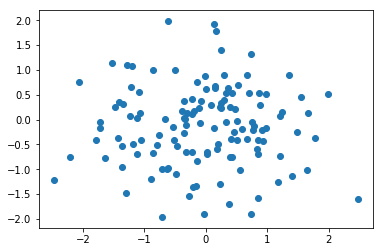

Plot 3


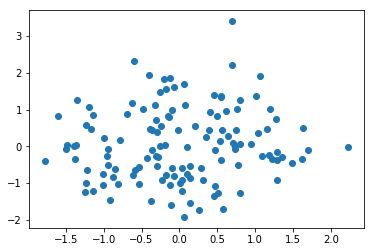

Plot 4


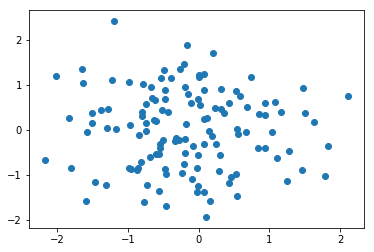


[[-0.23866773 -0.33691344]
 [-0.78283477  0.56202215]
 [ 0.7447432  -0.51651335]
 ...
 [-0.48897126  1.3427618 ]
 [-0.66414833  0.7176248 ]
 [-0.28193024 -0.2368126 ]]
<NDArray 768x2 @gpu(0)>
Epoch: 100


INFO:root:
binary training acc at epoch 200: facc=0.608788
INFO:root:time: 2.451579
INFO:root:time: 2.452018


Epoch: 200
epoch 200
Plot 0


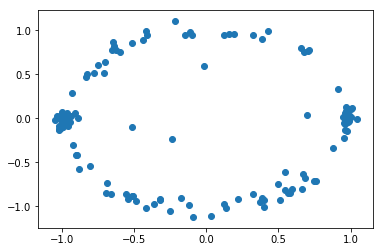

Plot 1


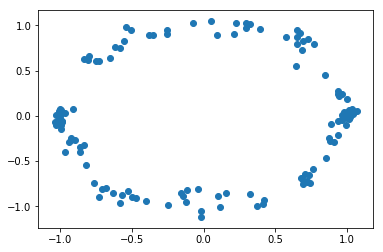

Plot 2


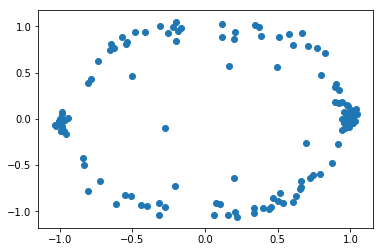

Plot 3


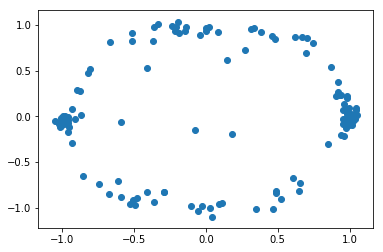

Plot 4


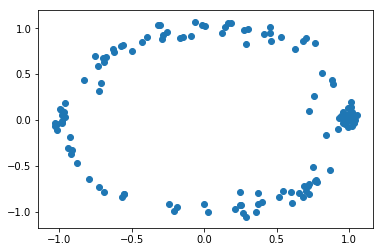


[[-0.2424647  -1.0338264 ]
 [ 0.96721214 -0.05382117]
 [-0.9441961  -0.3886885 ]
 ...
 [ 0.9899423  -0.08104556]
 [ 0.14221106  1.0155531 ]
 [-0.67669517  0.6853015 ]]
<NDArray 768x2 @gpu(0)>
Epoch: 300


INFO:root:
binary training acc at epoch 400: facc=0.522705
INFO:root:time: 2.207213
INFO:root:time: 2.208402


Epoch: 400
epoch 400
Plot 0


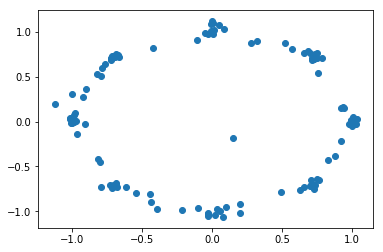

Plot 1


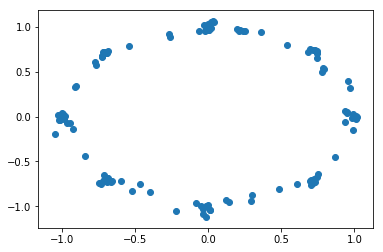

Plot 2


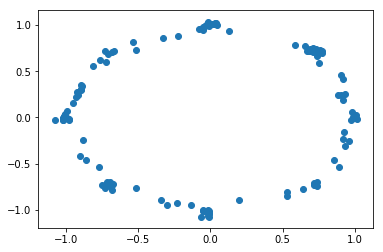

Plot 3


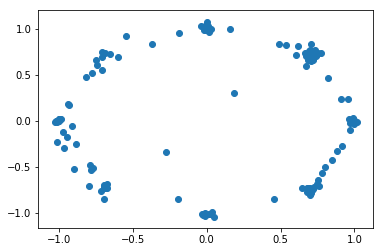

Plot 4


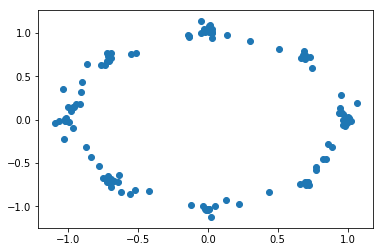


[[ 0.70687693 -0.6980825 ]
 [ 0.9688614  -0.16060226]
 [-0.98703694  0.05765234]
 ...
 [ 0.00452833  1.0814812 ]
 [-0.01197536 -1.0450187 ]
 [-0.02841653  1.0425398 ]]
<NDArray 768x2 @gpu(0)>
Epoch: 500


INFO:root:
binary training acc at epoch 600: facc=0.503677
INFO:root:time: 2.204301
INFO:root:time: 2.205402


Epoch: 600
epoch 600
Plot 0


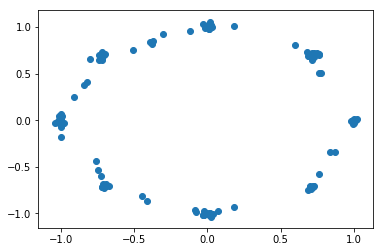

Plot 1


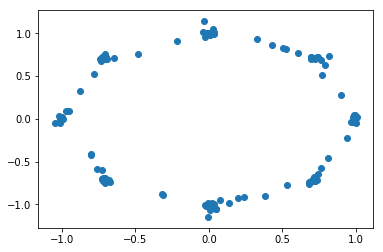

Plot 2


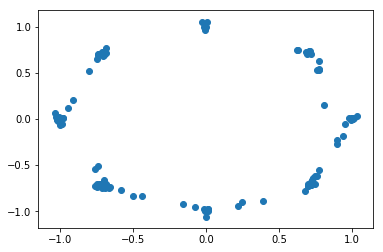

Plot 3


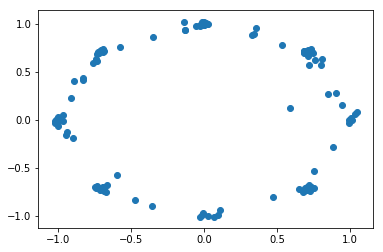

Plot 4


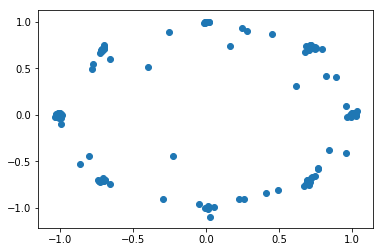


[[ 0.04586016 -1.0093892 ]
 [ 0.9837387  -0.01974802]
 [-0.6992061  -0.6765701 ]
 ...
 [ 0.7390089   0.72002584]
 [-0.72658527 -0.7281582 ]
 [-1.0258753   0.00876191]]
<NDArray 768x2 @gpu(0)>
Epoch: 700


INFO:root:
binary training acc at epoch 800: facc=0.500290
INFO:root:time: 2.240333
INFO:root:time: 2.240690


Epoch: 800
epoch 800
Plot 0


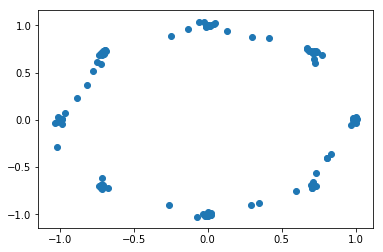

Plot 1


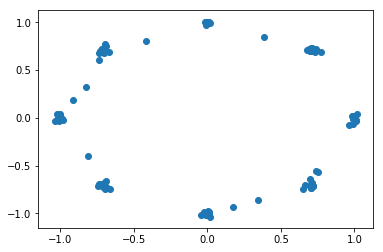

Plot 2


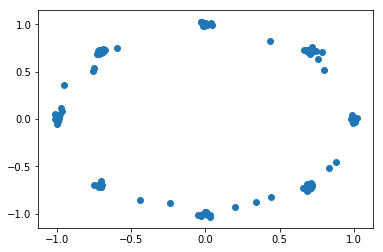

Plot 3


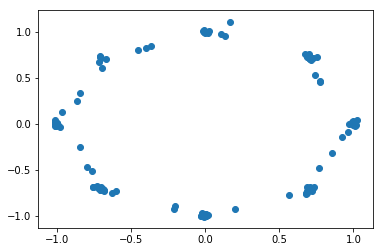

Plot 4


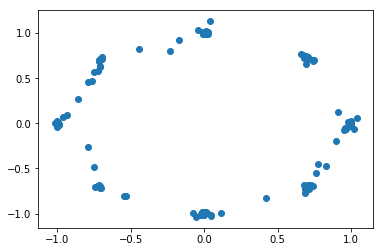


[[ 0.58117944  0.8082892 ]
 [-0.00145014 -1.002709  ]
 [ 0.6981087   0.7153955 ]
 ...
 [ 0.7123682  -0.6976493 ]
 [ 1.0026518  -0.01998151]
 [-0.00898178 -1.0103031 ]]
<NDArray 768x2 @gpu(0)>
Epoch: 900


INFO:root:
binary training acc at epoch 1000: facc=0.500080
INFO:root:time: 2.224686
INFO:root:time: 2.225152


Epoch: 1000
epoch 1000
Plot 0


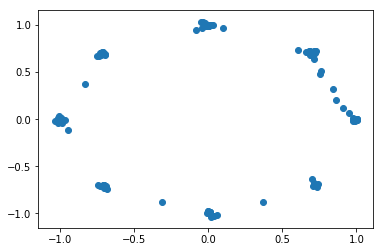

Plot 1


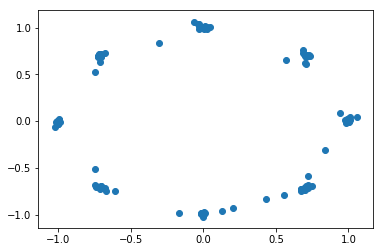

Plot 2


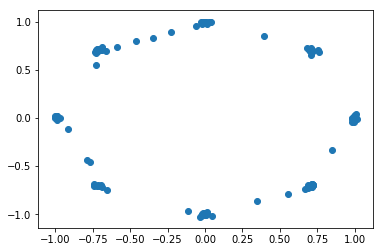

Plot 3


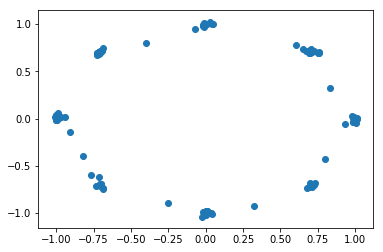

Plot 4


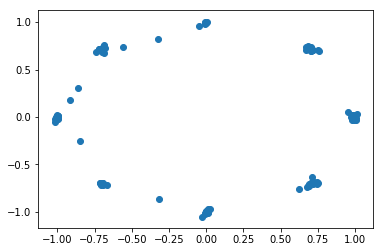


[[ 0.9849198   0.00765266]
 [-0.7227632  -0.7044752 ]
 [-0.77693     0.46547195]
 ...
 [-0.72153425  0.70471996]
 [ 0.9782542  -0.00978846]
 [ 0.9889506  -0.00522203]]
<NDArray 768x2 @gpu(0)>
Epoch: 1100


INFO:root:
binary training acc at epoch 1200: facc=0.500015
INFO:root:time: 2.216565
INFO:root:time: 2.217151


Epoch: 1200
epoch 1200
Plot 0


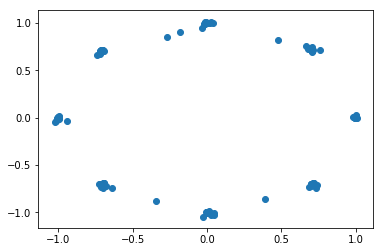

Plot 1


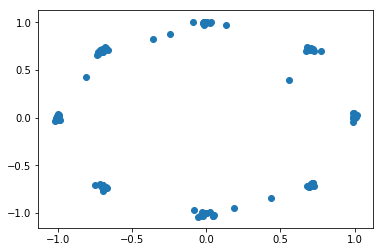

Plot 2


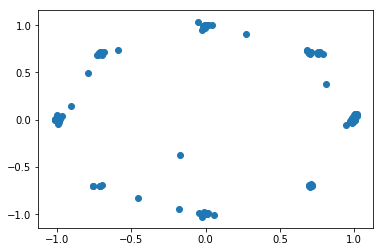

Plot 3


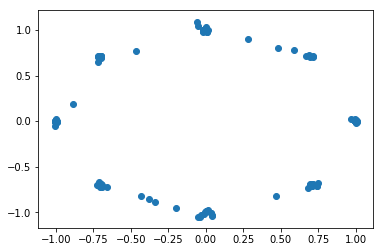

Plot 4


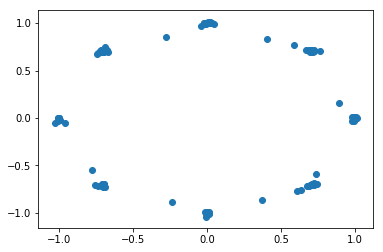


[[-0.7049597  -0.7062395 ]
 [ 0.01703664 -1.0132035 ]
 [ 0.6854621   0.7249569 ]
 ...
 [ 0.70259804  0.70007586]
 [-0.6878659  -0.7264724 ]
 [ 0.99130476 -0.03382035]]
<NDArray 768x2 @gpu(0)>
Epoch: 1300


INFO:root:
binary training acc at epoch 1400: facc=0.500057
INFO:root:time: 2.215673
INFO:root:time: 2.216135


Epoch: 1400
epoch 1400
Plot 0


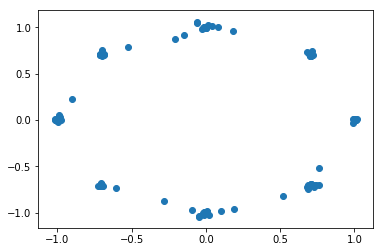

Plot 1


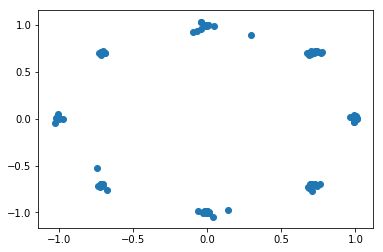

Plot 2


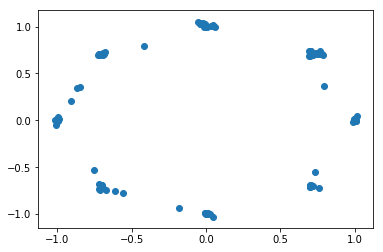

Plot 3


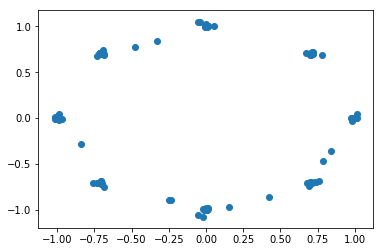

Plot 4


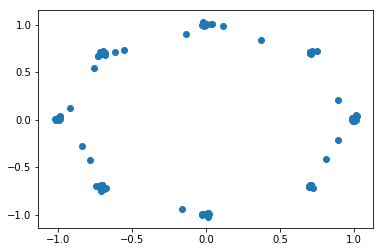


[[-6.7762524e-01  7.0217532e-01]
 [-9.9683887e-01 -3.8034446e-04]
 [ 9.9511927e-01  1.7888568e-02]
 ...
 [-6.9932669e-01 -7.1826464e-01]
 [-6.8936342e-01  7.0796287e-01]
 [ 8.9281905e-01 -2.1569410e-01]]
<NDArray 768x2 @gpu(0)>
Epoch: 1500


INFO:root:
binary training acc at epoch 1600: facc=0.499985
INFO:root:time: 2.229670
INFO:root:time: 2.230278


Epoch: 1600
epoch 1600
Plot 0


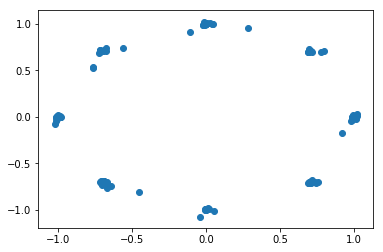

Plot 1


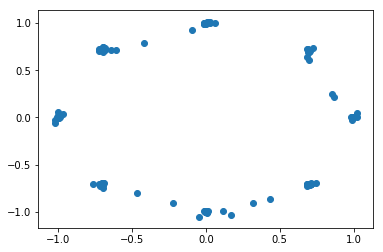

Plot 2


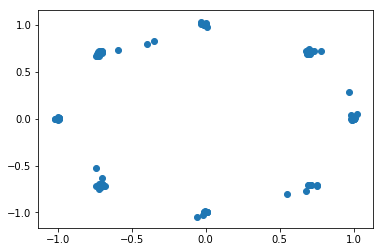

Plot 3


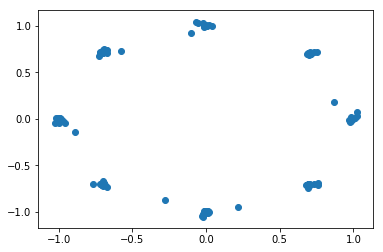

Plot 4


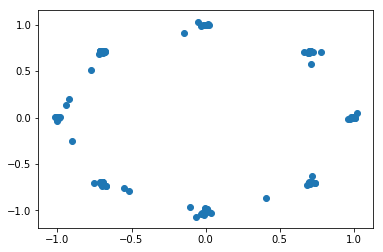


[[ 1.0002977  -0.00747839]
 [ 0.01113197  0.9988941 ]
 [ 0.9746546  -0.02338598]
 ...
 [-0.68720967 -0.7245823 ]
 [-0.06323102 -1.0690154 ]
 [-0.94288373  0.1363006 ]]
<NDArray 768x2 @gpu(0)>
Epoch: 1700


INFO:root:
binary training acc at epoch 1800: facc=0.500019
INFO:root:time: 2.199148
INFO:root:time: 2.199687


Epoch: 1800
epoch 1800
Plot 0


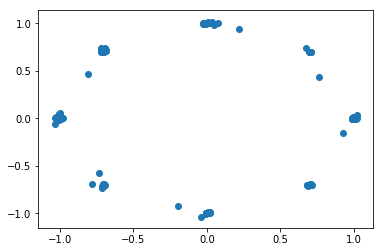

Plot 1


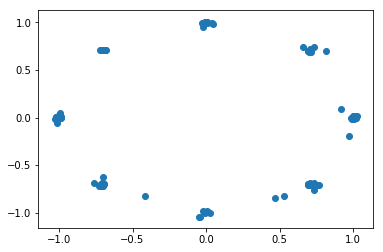

Plot 2


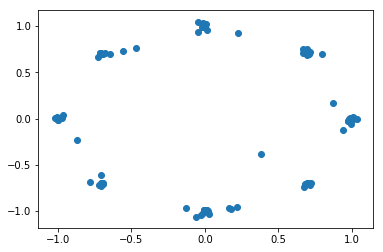

Plot 3


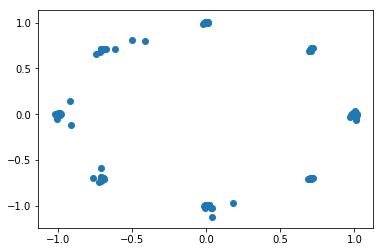

Plot 4


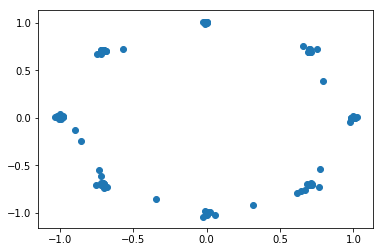


[[-0.69446033  0.70486677]
 [-0.7003575   0.74422497]
 [ 0.70049155 -0.6979339 ]
 ...
 [-0.00447123 -0.99790555]
 [ 0.70007724  0.7254252 ]
 [-0.34442762 -0.85221493]]
<NDArray 768x2 @gpu(0)>
Epoch: 1900


INFO:root:
binary training acc at epoch 2000: facc=0.500019
INFO:root:time: 2.205434
INFO:root:time: 2.205839


Epoch: 2000
epoch 2000
Plot 0


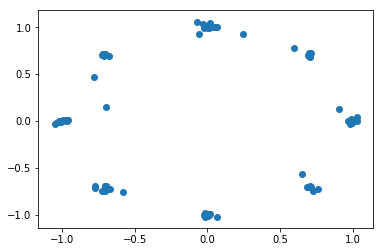

Plot 1


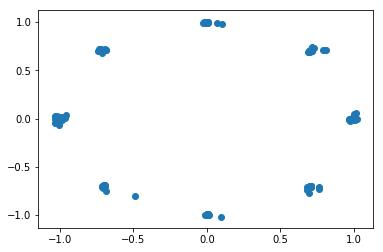

Plot 2


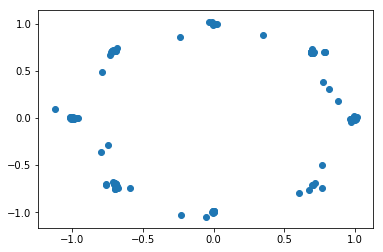

Plot 3


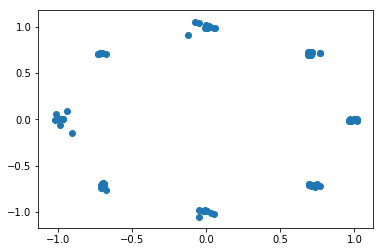

Plot 4


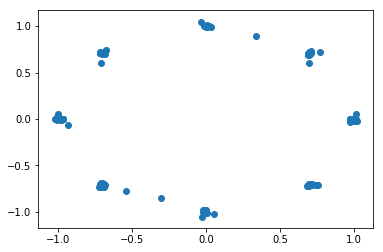


[[ 0.71256536  0.7274917 ]
 [-0.796669   -0.38736412]
 [-0.69363767 -0.69675606]
 ...
 [-0.0050884  -0.9899755 ]
 [ 0.97170633  0.00187365]
 [ 0.7131707   0.7130158 ]]
<NDArray 768x2 @gpu(0)>
Epoch: 2100


INFO:root:
binary training acc at epoch 2200: facc=0.500008
INFO:root:time: 2.216751
INFO:root:time: 2.217144


Epoch: 2200
epoch 2200
Plot 0


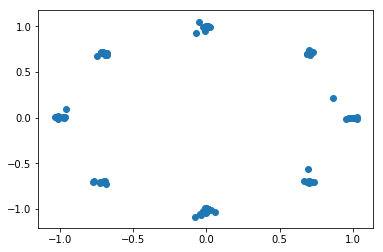

Plot 1


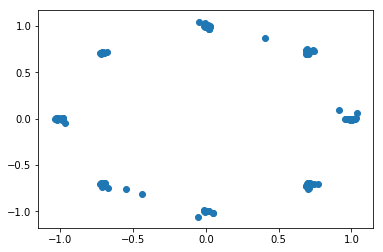

Plot 2


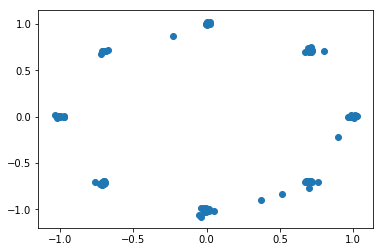

Plot 3


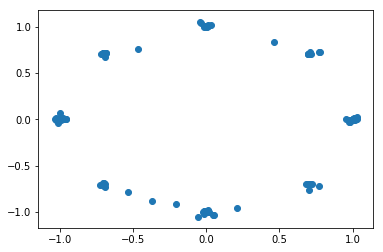

Plot 4


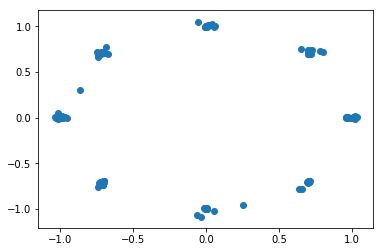


[[ 1.0060644  -0.02128096]
 [-0.7157233   0.6988333 ]
 [ 0.6947964  -0.7062938 ]
 ...
 [ 0.7043713  -0.70636   ]
 [ 0.0084572   0.9991721 ]
 [-0.73796403  0.658489  ]]
<NDArray 768x2 @gpu(0)>
Epoch: 2300


INFO:root:
binary training acc at epoch 2400: facc=0.500000
INFO:root:time: 2.219537
INFO:root:time: 2.219940


Epoch: 2400
epoch 2400
Plot 0


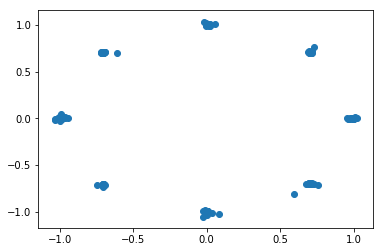

Plot 1


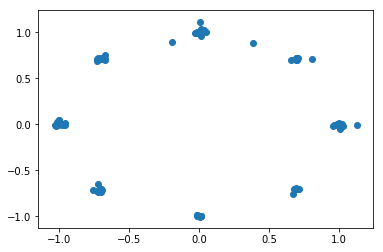

Plot 2


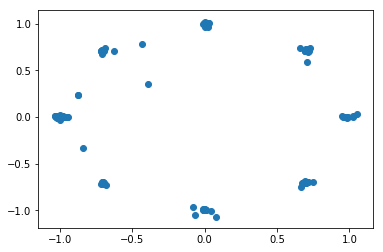

Plot 3


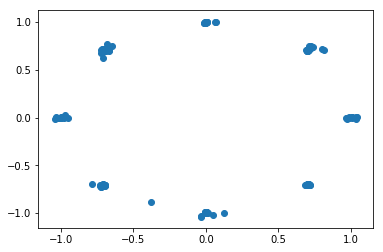

Plot 4


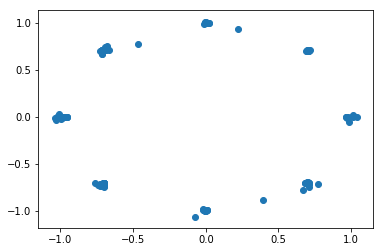


[[ 7.1536005e-01 -7.0256811e-01]
 [ 9.6427798e-01  2.1315884e-04]
 [-7.0554936e-01  7.1236241e-01]
 ...
 [-6.9925243e-01 -7.0016038e-01]
 [-7.0588219e-01 -6.9956905e-01]
 [-4.6289772e-01  7.7562052e-01]]
<NDArray 768x2 @gpu(0)>
Epoch: 2500


INFO:root:
binary training acc at epoch 2600: facc=0.500011
INFO:root:time: 2.222904
INFO:root:time: 2.223337


Epoch: 2600
epoch 2600
Plot 0


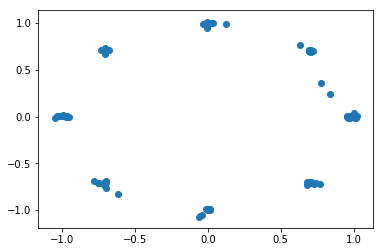

Plot 1


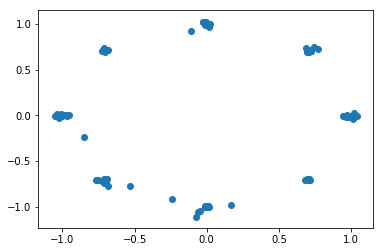

Plot 2


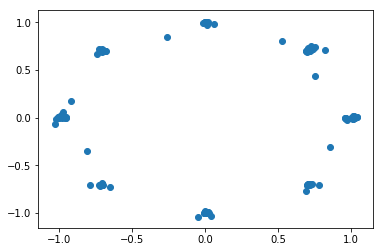

Plot 3


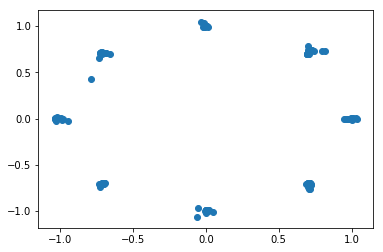

Plot 4


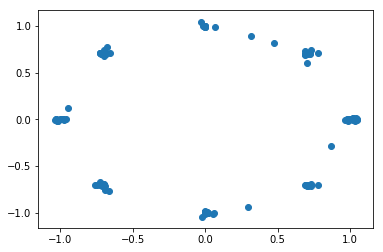


[[-0.7092822   0.706652  ]
 [-0.7113257   0.7064861 ]
 [-0.00405915 -0.99307305]
 ...
 [ 0.71593994 -0.7046177 ]
 [-0.70418686 -0.69891006]
 [ 0.01813666 -1.0002996 ]]
<NDArray 768x2 @gpu(0)>
Epoch: 2700


INFO:root:
binary training acc at epoch 2800: facc=0.499992
INFO:root:time: 2.227997
INFO:root:time: 2.228467


Epoch: 2800
epoch 2800
Plot 0


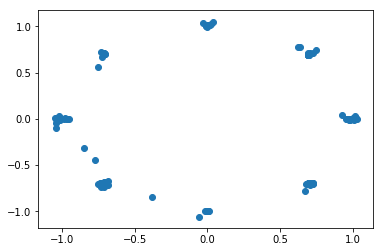

Plot 1


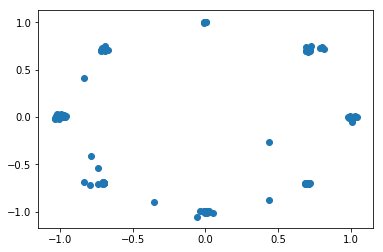

Plot 2


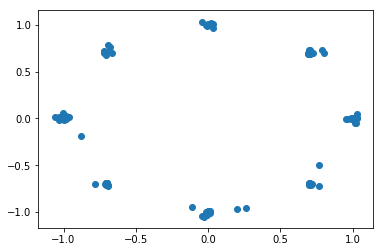

Plot 3


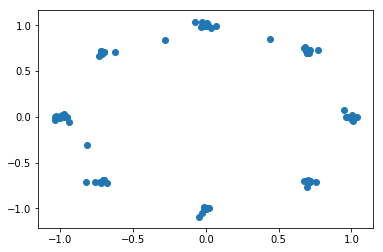

Plot 4


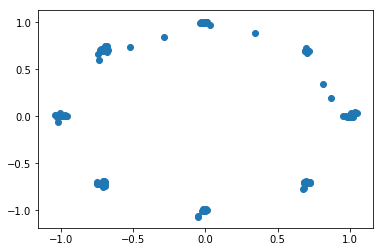


[[-6.9624692e-01 -7.0006502e-01]
 [-7.2119427e-01 -7.2982299e-01]
 [-7.1742988e-01  6.5187782e-01]
 ...
 [ 1.0470015e+00  3.9537989e-02]
 [ 9.7538245e-01 -1.8153361e-04]
 [-7.1817446e-01  7.1120530e-01]]
<NDArray 768x2 @gpu(0)>
Epoch: 2900


INFO:root:
binary training acc at epoch 3000: facc=0.500000
INFO:root:time: 2.219016
INFO:root:time: 2.219446


Epoch: 3000
epoch 3000
Plot 0


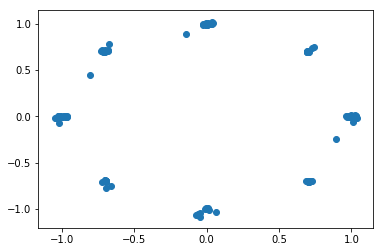

Plot 1


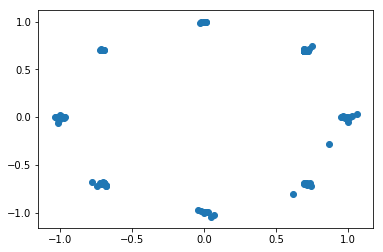

Plot 2


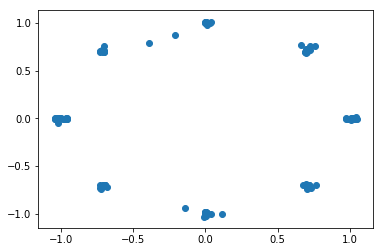

Plot 3


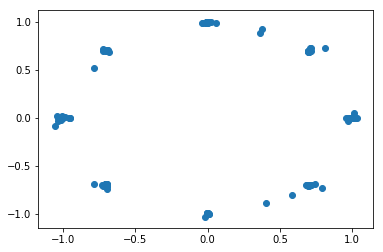

Plot 4


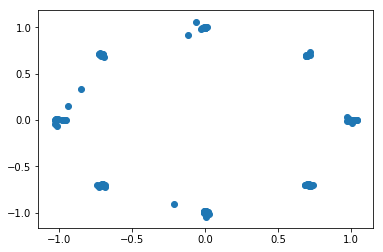


[[-0.05308849  1.0349891 ]
 [ 0.7001908   0.69427216]
 [ 0.693352    0.70072633]
 ...
 [ 0.70322746 -0.70007133]
 [-0.69583714 -0.6981853 ]
 [ 0.9888997   0.00172105]]
<NDArray 768x2 @gpu(0)>
Epoch: 3100


INFO:root:
binary training acc at epoch 3200: facc=0.500004
INFO:root:time: 2.202904
INFO:root:time: 2.203567


Epoch: 3200
epoch 3200
Plot 0


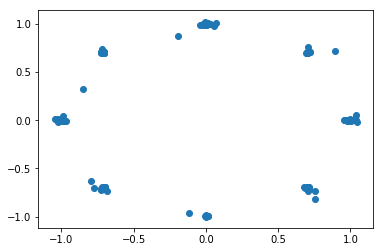

Plot 1


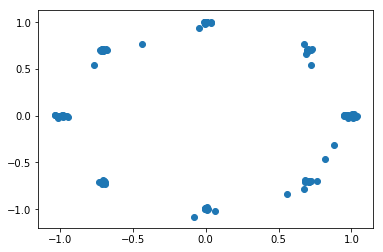

Plot 2


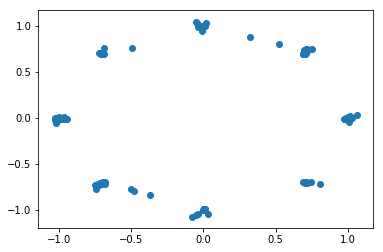

Plot 3


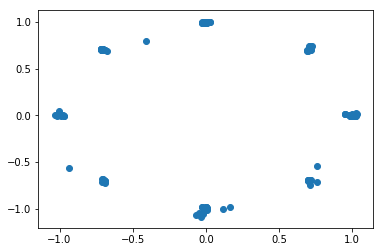

Plot 4


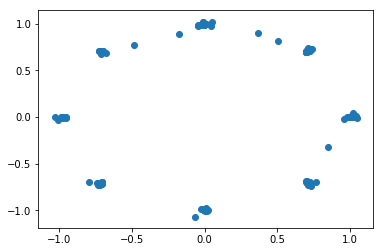


[[ 0.02245187  1.0131178 ]
 [ 0.06755661  1.0145868 ]
 [ 0.6985759   0.69687784]
 ...
 [ 0.00647091 -0.98665583]
 [-0.00714422  1.0236162 ]
 [-0.71653605  0.70301485]]
<NDArray 768x2 @gpu(0)>
Epoch: 3300


INFO:root:
binary training acc at epoch 3400: facc=0.500000
INFO:root:time: 2.242500
INFO:root:time: 2.242982


Epoch: 3400
epoch 3400
Plot 0


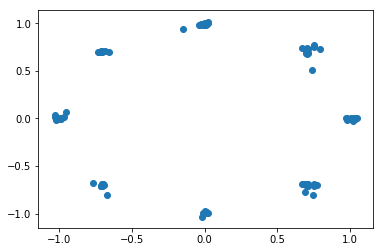

Plot 1


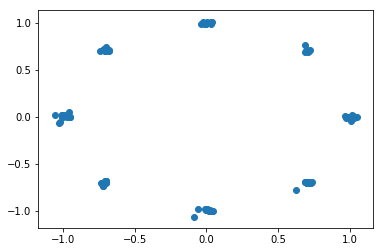

Plot 2


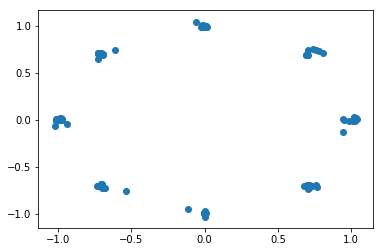

Plot 3


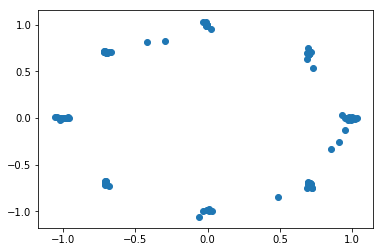

Plot 4


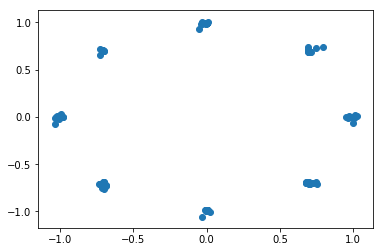


[[ 0.6779586  -0.69435716]
 [-0.69480973  0.7923349 ]
 [-0.75003546 -0.73030984]
 ...
 [ 0.00475267  0.9928915 ]
 [-0.03112587  0.9901646 ]
 [ 0.69666463  0.69892895]]
<NDArray 768x2 @gpu(0)>
Epoch: 3500


INFO:root:
binary training acc at epoch 3600: facc=0.500011
INFO:root:time: 2.211353
INFO:root:time: 2.211759


Epoch: 3600
epoch 3600
Plot 0


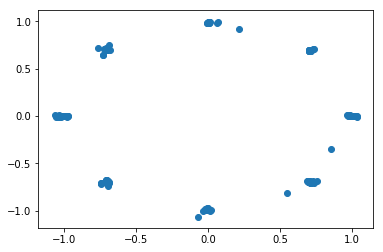

Plot 1


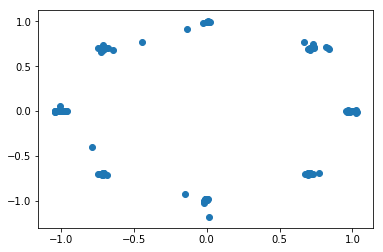

Plot 2


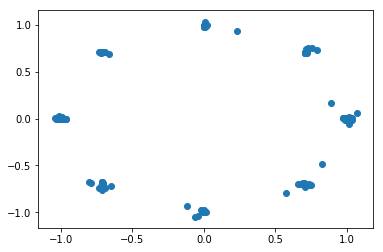

Plot 3


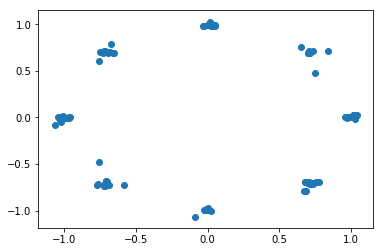

Plot 4


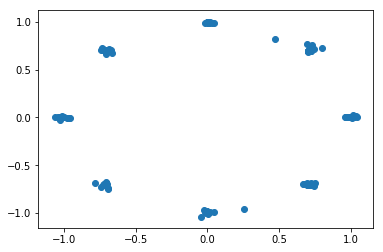


[[-7.0888853e-01 -7.2142518e-01]
 [ 1.0105276e+00 -3.6192420e-03]
 [-6.9461375e-01 -7.2980797e-01]
 ...
 [ 7.1489573e-01  7.1551704e-01]
 [ 9.9636498e-04 -1.0100451e+00]
 [ 4.9054762e-03  9.9418998e-01]]
<NDArray 768x2 @gpu(0)>
Epoch: 3700


INFO:root:
binary training acc at epoch 3800: facc=0.499996
INFO:root:time: 2.198723
INFO:root:time: 2.199122


Epoch: 3800
epoch 3800
Plot 0


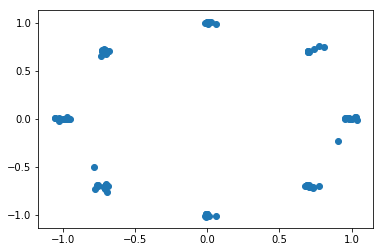

Plot 1


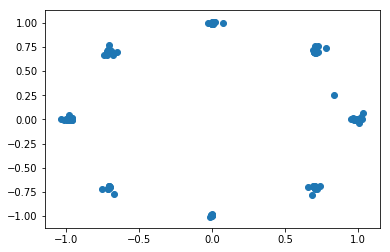

Plot 2


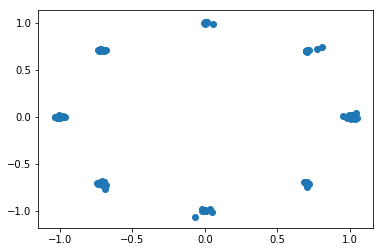

Plot 3


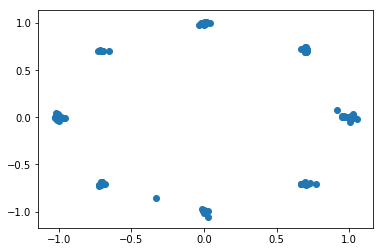

Plot 4


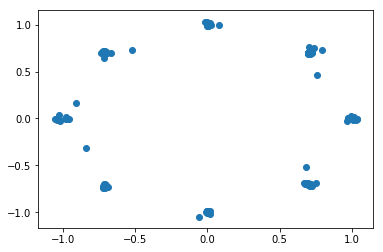


[[ 0.7032777  -0.7100394 ]
 [-0.7153562   0.7158676 ]
 [ 0.7115371   0.6921222 ]
 ...
 [ 0.6933507   0.6949197 ]
 [-0.00447264 -1.0049582 ]
 [ 0.6993404  -0.70449644]]
<NDArray 768x2 @gpu(0)>
Epoch: 3900


INFO:root:
binary training acc at epoch 4000: facc=0.499996
INFO:root:time: 2.253527
INFO:root:time: 2.254764


Epoch: 4000
epoch 4000
Plot 0


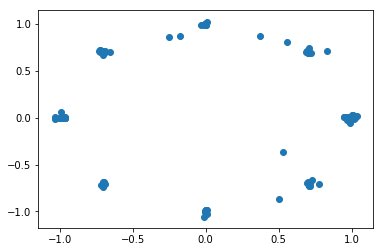

Plot 1


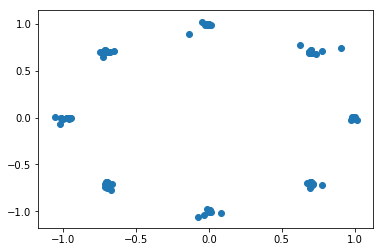

Plot 2


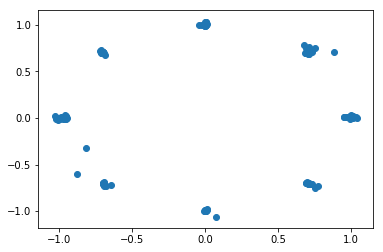

Plot 3


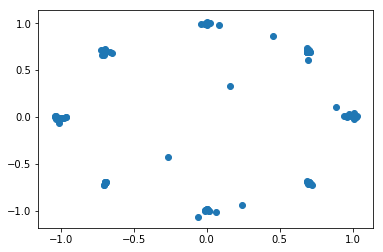

Plot 4


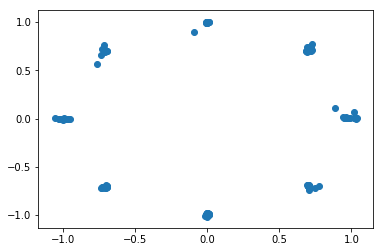


[[-0.6926935  -0.7018243 ]
 [-1.0047802  -0.00590748]
 [-0.70384455 -0.71542645]
 ...
 [-0.69869787 -0.7195134 ]
 [ 0.70339084 -0.71102315]
 [ 0.7101233  -0.6954057 ]]
<NDArray 768x2 @gpu(0)>
Epoch: 4100


INFO:root:
binary training acc at epoch 4200: facc=0.500008
INFO:root:time: 2.206701
INFO:root:time: 2.207170


Epoch: 4200
epoch 4200
Plot 0


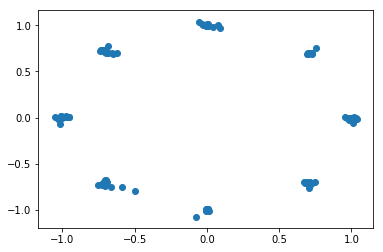

Plot 1


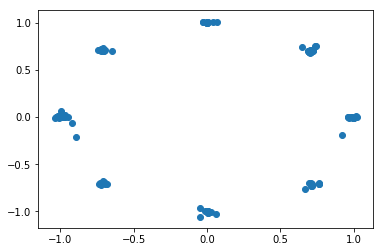

Plot 2


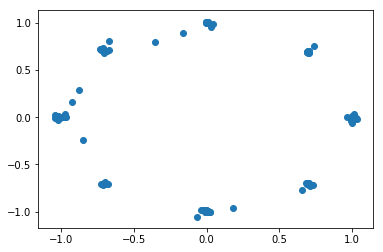

Plot 3


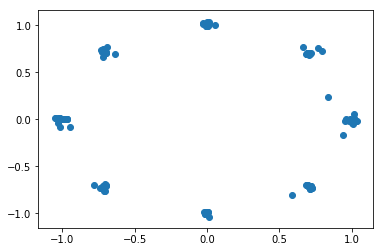

Plot 4


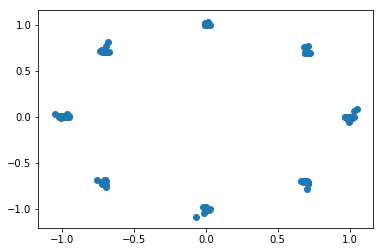


[[-7.3255432e-01  7.1906221e-01]
 [-1.0410171e+00 -8.1858926e-02]
 [ 6.9141996e-01 -6.9950581e-01]
 ...
 [-9.9634439e-01  2.2379835e-03]
 [-7.2995387e-04  9.9369848e-01]
 [ 1.9423608e-03  9.9685156e-01]]
<NDArray 768x2 @gpu(0)>
Epoch: 4300


INFO:root:
binary training acc at epoch 4400: facc=0.499992
INFO:root:time: 2.191847
INFO:root:time: 2.192576


Epoch: 4400
epoch 4400
Plot 0


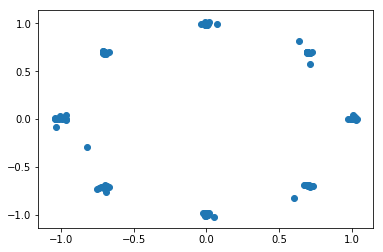

Plot 1


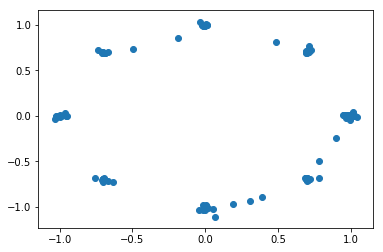

Plot 2


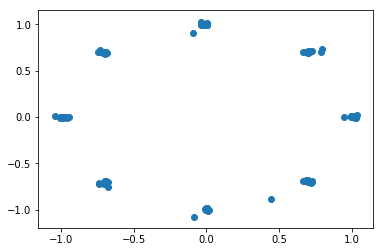

Plot 3


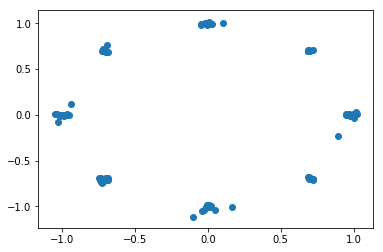

Plot 4


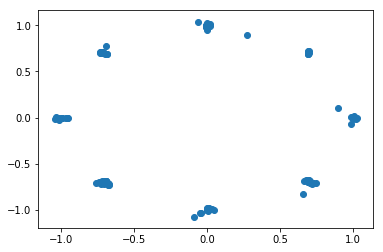


[[-0.03638455  0.9984446 ]
 [-0.6932837  -0.6979818 ]
 [ 0.702044   -0.69290483]
 ...
 [ 0.69545114 -0.69383156]
 [-0.9607487  -0.00982345]
 [ 0.00969354 -0.99596786]]
<NDArray 768x2 @gpu(0)>
Epoch: 4500


INFO:root:
binary training acc at epoch 4600: facc=0.500004
INFO:root:time: 2.265484
INFO:root:time: 2.265862


Epoch: 4600
epoch 4600
Plot 0


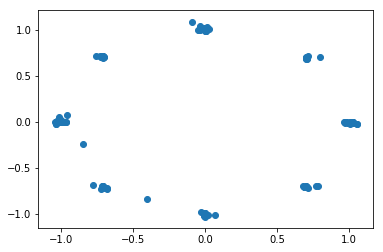

Plot 1


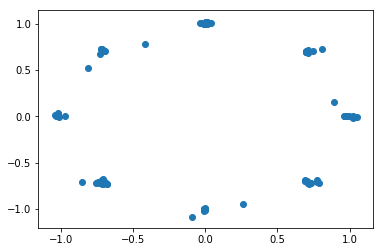

Plot 2


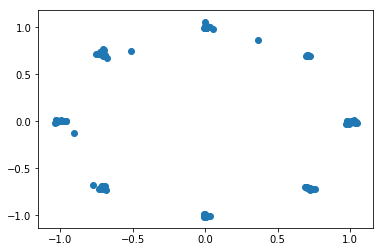

Plot 3


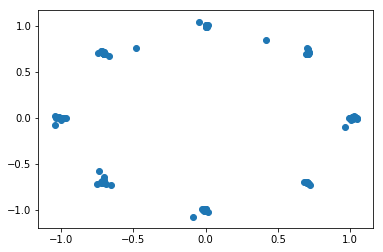

Plot 4


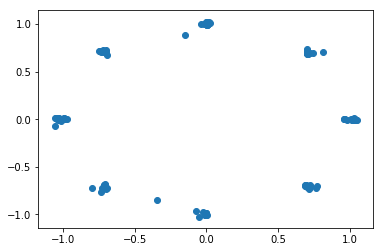


[[ 1.0163351e+00 -2.4834857e-04]
 [-9.7484916e-01 -1.1684655e-03]
 [-9.8198670e-01 -1.5321134e-03]
 ...
 [-7.9601008e-01 -7.2175068e-01]
 [-7.1126527e-01  7.1457857e-01]
 [ 7.2011125e-01 -7.0687228e-01]]
<NDArray 768x2 @gpu(0)>
Epoch: 4700


INFO:root:
binary training acc at epoch 4800: facc=0.500004
INFO:root:time: 2.289479
INFO:root:time: 2.289962


Epoch: 4800
epoch 4800
Plot 0


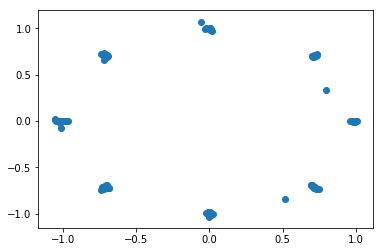

Plot 1


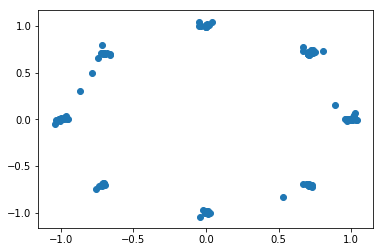

Plot 2


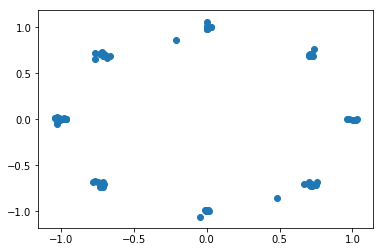

Plot 3


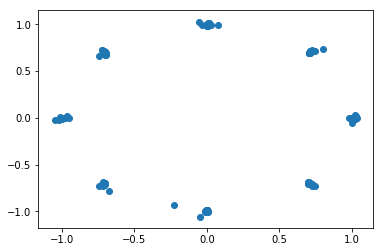

Plot 4


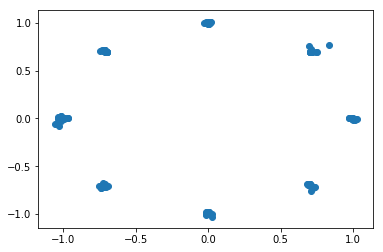


[[-0.6648146   0.6992605 ]
 [ 0.00137173 -1.004788  ]
 [ 0.00785922  1.0080271 ]
 ...
 [ 0.71629554 -0.7272371 ]
 [ 0.00282323 -0.9880482 ]
 [-0.01413501 -1.0102803 ]]
<NDArray 768x2 @gpu(0)>
Epoch: 4900


INFO:root:
binary training acc at epoch 5000: facc=0.500000
INFO:root:time: 2.212283
INFO:root:time: 2.213315


Epoch: 5000
epoch 5000
Plot 0


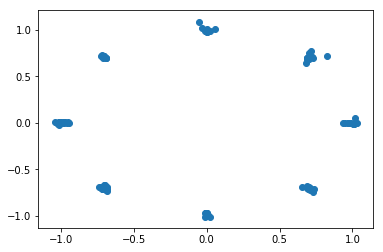

Plot 1


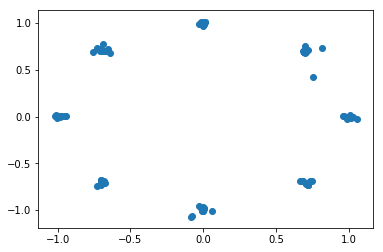

Plot 2


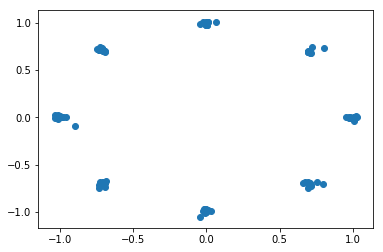

Plot 3


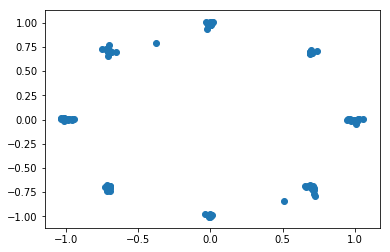

Plot 4


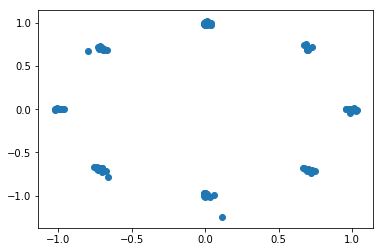


[[-0.6993065   0.7029277 ]
 [ 0.75503075 -0.71362275]
 [-1.0588754   0.00757135]
 ...
 [ 0.95604193  0.00418711]
 [ 0.72537804 -0.71635354]
 [-0.6676964   0.6837855 ]]
<NDArray 768x2 @gpu(0)>


In [12]:
from datetime import datetime
import time
import logging

real_label = nd.ones((batch_size * 4,), ctx = ctx)
fake_label = nd.zeros((batch_size * 4,), ctx = ctx)

def facc(label, pred):
    pred = pred.ravel()
    label = label.ravel()
    return ((pred>0.5) == label).mean()
metric = mx.metric.CustomMetric(facc)


stamp =  datetime.now().strftime('%Y_%m_%d-%H_%M')
logging.basicConfig(level=logging.DEBUG)
print("Begin")




print("BEFORE THE FIRE:")
latent1 = mx.nd.random_normal(loc = 0, scale = 3, shape=(batch_size, latent_z_size, 2), ctx=ctx)
fake = netG(latent1)
for i in range(5):
    latent = mx.nd.random_normal(loc = 0, scale = 3, shape=(batch_size, latent_z_size, 2), ctx=ctx)
    fakeadd = netG(latent)
    x = fakeadd.T[0].asnumpy().tolist()
    y = fakeadd.T[1].asnumpy().tolist()
    print("Plot %d" % i)
    plt.scatter(x,y)
    plt.show()
    fake = mx.ndarray.concat(fake, fakeadd, dim = 0)
    
print("Good luck bud")





#set up Discriminator first

for i in range(100):
    tic = time.time()
    btic = time.time()
    train_data.reset()
    iter = 0
    #print("RUNNING")
    for batch1 in train_data:
        batch2 = next(train_data, batch1)
        batch3 = next(train_data, batch1)
        batch4 = next(train_data, batch1)
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################

        data = (mx.ndarray.concat(batch1.data[0], batch2.data[0], batch3.data[0], batch4.data[0], dim = 0)).as_in_context(ctx)
        
        #test new shape for data
        
        
        
        #print(data)
        #if iter == 0:
            #x = data.T[0].asnumpy().tolist()
            #y = data.T[1].asnumpy().tolist()
            #print(x)
            #print(y)
            #plt.scatter(x,y)
            #plt.show()
            
        
        
        noise = mx.ndarray.random_normal(0, 0.1, batch_size * 4, ctx = ctx)
        real_label_noise = mx.ndarray.add(real_label, noise)
        noise = mx.ndarray.random_normal(0, 0.1, batch_size * 4, ctx = ctx)
        fake_label_noise = mx.ndarray.add(fake_label, noise)
        #print("TESTING 123")
        #print(real_label_noise)
        #print(fake_label_noise)
        #print("THIS IS A CHECK")
        #print(data)
        #print(len(data))
        #print(len(data[0]))
        #print(len(data[0][0]))
        #print(len(batch1.data[0]))
        #print(len(batch1.data[0][0]))
        #print(len(batch1.data[0][0][0]))
        #print(len(batch2.data[0]))
        #print(len(batch2.data[0][0]))
        #print(len(batch2.data[0][0][0]))
        #print(data)
        
        
        latent_z1 = mx.nd.random_normal(loc = 0, scale = 3, shape=(batch_size, latent_z_size, 2), ctx=ctx)
        latent_z2 = mx.nd.random_normal(loc = 0, scale = 3, shape=(batch_size, latent_z_size, 2), ctx=ctx)
        latent_z3 = mx.nd.random_normal(loc = 0, scale = 3, shape=(batch_size, latent_z_size, 2), ctx=ctx)
        latent_z4 = mx.nd.random_normal(loc = 0, scale = 3, shape=(batch_size, latent_z_size, 2), ctx=ctx)

        with autograd.record():
            # train with real image
            #print("Real Data")
            #print(data)
            output = netD1(data).reshape((-1, 1))
            #print("Output of Discriminator")
            #print(output)
            errD1_real = loss(output, real_label_noise)
            #print("This is the guess for real")
            #print(output)
            metric.update([real_label,], [output,])

            # train with fake image
            firstFake = netG(latent_z1)
            secondFake = netG(latent_z2)
            thirdFake = netG(latent_z3)
            fourthFake = netG(latent_z4)
            #print("testing 1")
            #print(firstFake)
            
            #only add if using dense
            #firstFake = firstFake.reshape((128, 1, 2))
            #secondFake = secondFake.reshape((128, 1, 2))  
            #print("testing 2")
            #print(firstFake)
            

            fake = mx.ndarray.concat(firstFake, secondFake, thirdFake, fourthFake, dim = 0)
            #print(fake)
            #print(fake)
            #print("TESTING")
            #print(len(fake))
            output = netD1(fake.detach()).reshape((-1, 1))
            errD1_fake = loss(output, fake_label_noise)
            errD1 = errD1_real + errD1_fake
            errD1.backward()
            metric.update([fake_label,], [output,])

        trainerD1.step(data.shape[0])
        
        with autograd.record():
            # train with real image
            #print("Real Data")
            #print(data)
            output = netD2(data).reshape((-1, 1))
            #print("Output of Discriminator")
            #print(output)
            errD2_real = loss(output, real_label_noise)
            #print("This is the guess for real")
            #print(output)
            metric.update([real_label,], [output,])

            # train with fake image
            firstFake = netG(latent_z1)
            secondFake = netG(latent_z2)
            thirdFake = netG(latent_z3)
            fourthFake = netG(latent_z4)
            #print("testing 1")
            #print(firstFake)
            
            #only add if using dense
            #firstFake = firstFake.reshape((128, 1, 2))
            #secondFake = secondFake.reshape((128, 1, 2))  
            #print("testing 2")
            #print(firstFake)
            

            fake = mx.ndarray.concat(firstFake, secondFake, thirdFake, fourthFake, dim = 0)
            #print("TESTING")
            #print(len(fake))
            output = netD2(fake.detach()).reshape((-1, 1))
            errD2_fake = loss(output, fake_label_noise)
            errD2 = errD2_real + errD2_fake
            errD2.backward()
            metric.update([fake_label,], [output,])

        trainerD2.step(data.shape[0])
        
        
        
    name, acc = metric.get()
    metric.reset()
    
# print("Done setting up Discriminator")
for epoch in range(epochs+1):
    train_data.reset()
    tic = time.time()
    btic = time.time()
    count = 0
    iter = 0
    #print("RUNNING")
    for batch1 in train_data:
        batch2 = next(train_data, batch1)
        batch3 = next(train_data, batch1)
        batch4 = next(train_data, batch1)
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################

        data = (mx.ndarray.concat(batch1.data[0], batch2.data[0], batch3.data[0], batch4.data[0], dim = 0)).as_in_context(ctx)
        #if count == 0:
            #print("Real DATA")
            #x = 
            #plt.scatter(x,y)
            #plt.show()
            
            
            #print("END of Real Data")
        
        
        noise = mx.ndarray.random_normal(0, 0.1, batch_size * 4, ctx = ctx)
        real_label_noise = mx.ndarray.add(real_label, noise)
        noise = mx.ndarray.random_normal(0, 0.1, batch_size * 4, ctx = ctx)
        fake_label_noise = mx.ndarray.add(fake_label, noise)
        #print("THIS IS A CHECK")
        #print(data)
        #print(len(data))
        #print(len(data[0]))
        #print(len(data[0][0]))
        #print(len(batch1.data[0]))
        #print(len(batch1.data[0][0]))
        #print(len(batch1.data[0][0][0]))
        #print(len(batch2.data[0]))
        #print(len(batch2.data[0][0]))
        #print(len(batch2.data[0][0][0]))
        #print(data)
        
        
        latent_z1 = mx.nd.random_normal(loc = 0, scale = 3, shape=(batch_size, latent_z_size, 2), ctx=ctx)
        latent_z2 = mx.nd.random_normal(loc = 0, scale = 3, shape=(batch_size, latent_z_size, 2), ctx=ctx)
        latent_z3 = mx.nd.random_normal(loc = 0, scale = 3, shape=(batch_size, latent_z_size, 2), ctx=ctx)
        latent_z4 = mx.nd.random_normal(loc = 0, scale = 3, shape=(batch_size, latent_z_size, 2), ctx=ctx)
        with autograd.record():
            # train with real image
            #print("Real Data")
            #print(data)
            output = netD1(data).reshape((-1, 1))
            #print("Output of Discriminator")
            #print(output)
            errD1_real = loss(output, real_label_noise)
            #print("This is the guess for real")
            #print(output)
            metric.update([real_label], [output,])

            # train with fake image
            firstFake = netG(latent_z1)
            secondFake = netG(latent_z2)
            thirdFake = netG(latent_z3)
            fourthFake = netG(latent_z4)
            #print("testing 1")
            #print(firstFake)

            #only add if using dense
            #firstFake = firstFake.reshape((128, 1, 2))
            #secondFake = secondFake.reshape((128, 1, 2))  
            #print("testing 2")
            #print(firstFake)


            fake = mx.ndarray.concat(firstFake, secondFake, thirdFake, fourthFake, dim = 0)
            #print("TESTING")
            #print(len(fake))
            output = netD1(fake.detach()).reshape((-1, 1))
            errD1_fake = loss(output, fake_label_noise)
            errD1 = errD1_real + errD1_fake
            errD1.backward()
            metric.update([fake_label,], [output,])

        trainerD1.step(data.shape[0])
        
        with autograd.record():
            # train with real image
            #print("Real Data")
            #print(data)
            output = netD2(data).reshape((-1, 1))
            #print("Output of Discriminator")
            #print(output)
            errD2_real = loss(output, real_label_noise)
            #print("This is the guess for real")
            #print(output)
            metric.update([real_label], [output,])

            # train with fake image
            firstFake = netG(latent_z1)
            secondFake = netG(latent_z2)
            thirdFake = netG(latent_z3)
            fourthFake = netG(latent_z4)
            #print("testing 1")
            #print(firstFake)

            #only add if using dense
            #firstFake = firstFake.reshape((128, 1, 2))
            #secondFake = secondFake.reshape((128, 1, 2))  
            #print("testing 2")
            #print(firstFake)


            fake = mx.ndarray.concat(firstFake, secondFake, thirdFake, fourthFake, dim = 0)
            #print("TESTING")
            #print(len(fake))
            output = netD2(fake.detach()).reshape((-1, 1))
            errD2_fake = loss(output, fake_label_noise)
            errD2 = errD2_real + errD2_fake
            errD2.backward()
            metric.update([fake_label,], [output,])

        trainerD2.step(data.shape[0])
            
            
        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        with autograd.record():
            fake1 = netG(latent_z1)
            fake2 = netG(latent_z2)
            fake3 = netG(latent_z3)
            fake4 = netG(latent_z4)
            #print(fake1)
            #rint(fake1.T)
            #print(fake1.T[0])
           # print(fake1.T[0][1])
            
            
            #only add if using dense
            #fake1 = fake1.reshape((128, 1, 2))
            #fake2 = fake2.reshape((128, 1, 2))
            
            output = netD1(mx.ndarray.concat(fake1, fake2, fake3, fake4, dim = 0)).reshape((-1, 1))
            errG = loss(output, real_label_noise)
            errG.backward()

        trainerG.step(mx.ndarray.concat(batch1.data[0], batch2.data[0], batch3.data[0], batch4.data[0]).shape[0])
        
        with autograd.record():
            fake1 = netG(latent_z1)
            fake2 = netG(latent_z2)
            fake3 = netG(latent_z3)
            fake4 = netG(latent_z4)
            #print(fake1)
            #rint(fake1.T)
            #print(fake1.T[0])
           # print(fake1.T[0][1])
            
            
            #only add if using dense
            #fake1 = fake1.reshape((128, 1, 2))
            #fake2 = fake2.reshape((128, 1, 2))
            
            output = netD2(mx.ndarray.concat(fake1, fake2, fake3, fake4, dim = 0)).reshape((-1, 1))
            errG = loss(output, real_label_noise)
            errG.backward()

        trainerG.step(mx.ndarray.concat(batch1.data[0], batch2.data[0], batch3.data[0], batch4.data[0]).shape[0])
        
        
        

        # Print log infomation every ten batches
        if iter % 10 == 0:
            name, acc = metric.get()
            #logging.firstFake info('speed: {} samples/s'.format(batch_size / (time.time() - btic)))
            #logging.info('discriminator loss = %f, generator loss = %f, binary training acc = %f at iter %d epoch %d'
            #         %(nd.mean(errD).asscalar(),
            #           nd.mean(errG).asscalar(), acc, iter, epoch))
        iter = iter + 1
        btic = time.time()

    name, acc = metric.get()
    if acc == 1.0 and epoch >201:
        print("FAIL")
        sys.exit("D too good")
    metric.reset()
    #logging.info('\nbinary training acc at epoch %d: %s=%f' % (epoch, name, acc))
    #logging.info('time: %f' % (time.time() - tic))

    #Visualize one generated image for each epoch
    fake_img = fake1[0]
    #print("testing")
    #print("Fake data")
    #print(fake1)
    ##print("fake data transposed")
    #print(fake1.T)
    #print(len(fake))0
    #print(len(fake[0]))
    #print(len(fake[0][0]))
    #print(fake)
    
    
    #test small print
    #print("epoch %d" % (epoch))
    #print("X: %s   Y: %s  " % (fake_img[0][0],fake_img[0][1]))
    #x= fake.T[0][0].asnumpy().tolist()
    #y = fake.T[1][0].asnumpy().tolist()
    #print("Plot")
    #plt.scatter(x,y)
    #plt.show()
    
    
    
    
    #real print
    if(epoch%100 ==0):
        print("Epoch: %d" % epoch)
    if(epoch%200 == 0):# or epoch % 200 == 1 or epoch % 200 == 2 or epoch % 200 == 3):
        logging.info('\nbinary training acc at epoch %d: %s=%f' % (epoch, name, acc))
        logging.info('time: %f' % (time.time() - tic))
        logging.info('time: %f' % (time.time() - tic))
        print("epoch %d" % (epoch))
        
        #For convolution?
        #print("X: %s   Y: %s  " % (fake_img[0][0],fake_img[0][1]))
        #x= fake1.T[0][0].asnumpy().tolist()
        #y = fake1.T[0][1].asnumpy().tolist()
        latent1 = mx.nd.random_normal(loc = 0, scale = 3, shape=(batch_size, latent_z_size, 2), ctx=ctx)
        fake = netG(latent1)
        for i in range(5):
            latent = mx.nd.random_normal(loc = 0, scale = 3, shape=(batch_size, latent_z_size, 2), ctx=ctx)
            fakeadd = netG(latent)
            x = fakeadd.T[0].asnumpy().tolist()
            y = fakeadd.T[1].asnumpy().tolist()
            print("Plot %d" % i)
            plt.scatter(x,y)
            plt.show()
            fake = mx.ndarray.concat(fake, fakeadd, dim = 0)
        #fake = mx.ndarray.concat(fake1, fake2, fake3, fake4, dim = 0)
        

        #print("X: ")
        #print(fake.T[0][0])
        #print("Y: ")
        #print(fake.T[0][1])
        #print("")
        #print("")
        print(fake)


        #plt.show()   
    
    # visualize(fake_img)
    # plt.show()
